<a href="https://colab.research.google.com/github/SURIYA-PRAKASHA/GRIP/blob/main/PredictionML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP - The Spark Foundation**

## **Data Science & Business Analytics Intern**

### **Author:Suriyaprakash A**

# **Task :1** # **Prediction using Supervised** **ML**

In [49]:
#Import the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [50]:
#reading the given data set
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data is Readed Sucessfully")

data.head(7)

Data is Readed Sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [51]:
#Cheacking null values
data.isnull().sum()

,0
Hours,0
Scores,0


**There is no null values so,Data cleaning is not Required.**

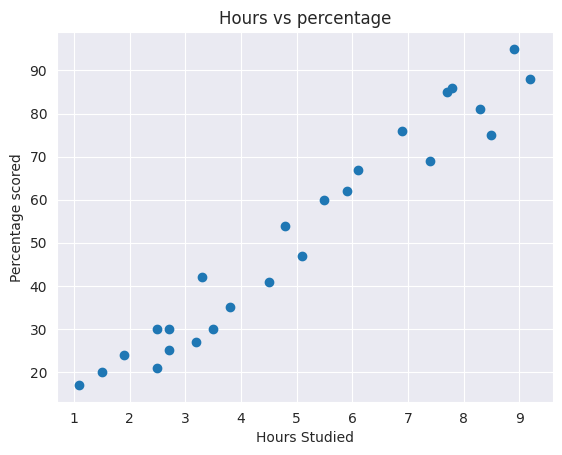

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [38]:
#Visualize our data's
#Scatterplot
#sns.set_style('darkgrid')
plt.scatter(x= data['Hours'],y= data['Scores'])
plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage scored')
plt.show()
print(data.corr())

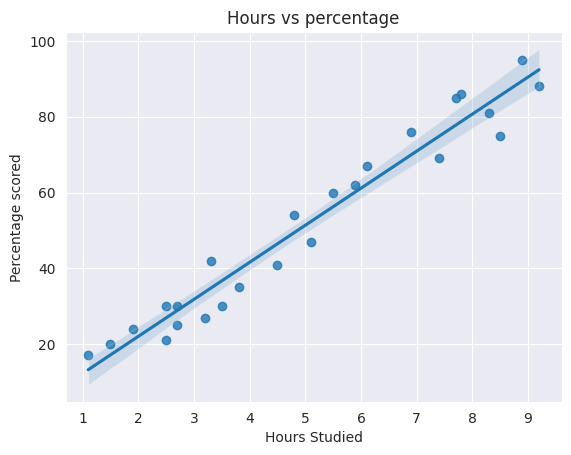

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [52]:
#Regressionplot
sns.set_style('darkgrid')
sns.regplot(x= data['Hours'],y= data['Scores'])
plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage scored')
plt.show()
print(data.corr())

**The variables are positively correlated.**

# **Training Model**

1) Split the Given data

In [53]:
#Defining x and y from the Data
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

#spliting the Data in 2(train and test)
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=0)

2) Fitting the Data into model

In [41]:
#Using Linear Regression
regression = LinearRegression()
regression.fit(train_x,train_y)

print("*****Model is Successfully Trained*****")


*****Model is Successfully Trained*****


# **Predicting the Percntage of Marks**

In [54]:
pred_y = regression.predict(test_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_x],'Predicted Scores':[k for k in pred_y]})
prediction

,Hours,Predicted Scores
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# **Compare the Original and Predicted Scores**

In [43]:
compare_scores =pd.DataFrame({'Original Scores': test_y, 'Predicted Scores':pred_y})
compare_scores

,Original Scores,Predicted Scores
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#  **Visual Comparision between Original and Predicted Scores**

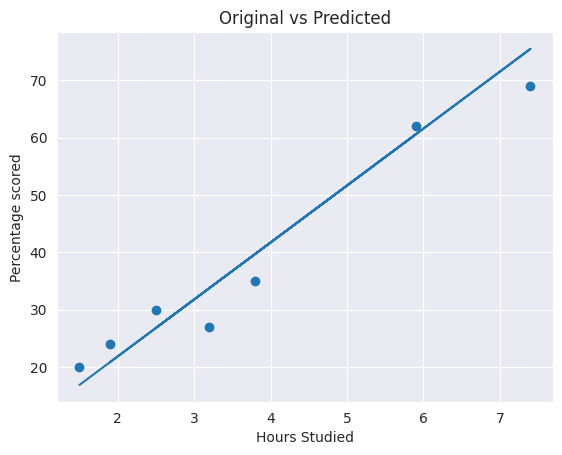

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [44]:
#Scatterplot
plt.scatter(x= test_x,y= test_y)
plt.plot(test_x,pred_y)
plt.title('Original vs Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage scored')
plt.show()
print(data.corr())

# **Evaluating the Model**

In [47]:
#accuracy calculating of model
print('mean absolute error:',mean_absolute_error(test_y,pred_y))

mean absolute error: 4.130879918502482


# **Predicted score of 9.25 hours**

In [56]:
hours =[9.25]
sol = regression.predict([hours])
print('scores={}',format(round(sol[0],3)))

scores={} 93.893


# **Training Scores vs Tested Scores**

In [55]:
print("Train : ",regression.score(train_x,train_y)*100)
print("Test : ",regression.score(test_x,test_y)*100)

Train :  94.84509249326872
Test :  93.67661043365057
